In [4]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
# %run "classes_ipynb.ipynb"
sys.path.insert(0, "..")
import classes3_rotation_middle_scap as classes3
warnings.filterwarnings('ignore')

# Thelen model: 2 svaly
## Optimalni delka = delka svalu v pocatecni konfiguraci
## Pomer F0m sval1:sval2 = 1:1 - 100:1
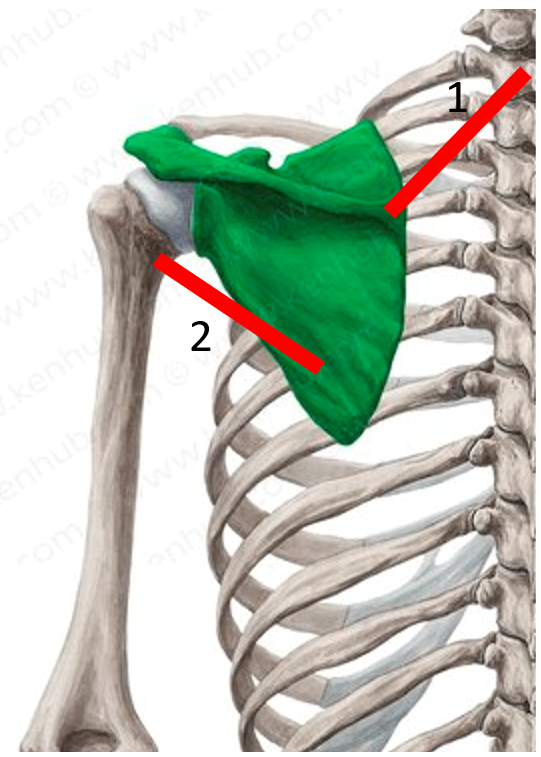

In [7]:
phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
t1 = [-0.2,-0.3]
s1 = [0,-0.2]
s2 = [0.15,-0.1]
h2 = [0.08,0]
GH = []
l01 = np.sqrt((s1[0]-t1[0])**2+(s1[1]-t1[1])**2)
l02 = np.sqrt((h2[0]-s2[0])**2+(h2[1]-s2[1])**2)

# zadefinovani glenohumeralniho jointu od stredu rotace

F_iso = np.linspace(1,100,10)
for i,F_iso in enumerate(F_iso):
    model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01,F_iso = F_iso,epsm0 = 0.6,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    # model.add_muscle(l0=0.68,F_iso = 1,epsm0 = 0.55,scap_ins=s,thorax_ins = t,muscle_group = 'ThorScap')
    model.add_muscle(l0=l02,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,muscle_group = 'ScapHum',muscle_model='Thelen')
    # print(len(model.U_muscles))
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi,label='%s' % round(F_iso,2))
plt.legend(title = 'F0m of muscle 1 [N]')
plt.xlabel('Humerus angle')
plt.ylabel('Scapula angle')
plt.title("Závislost natočení lopatky na natočení paže, model s 2 svaly")
plt.savefig("2_svaly")
plt.show()

TypeError: 'NoneType' object is not subscriptable

# Thelen model, 3 svaly: 2 thoracoscapularni a 1 scapulohumeralni
## Sval 2: l0 je delka v pocatecni konfiguraci, F0m je 1N
## Sval 1: l0 je delka v pocatecni konfiguraci, F0m je 10N a 50N
## sval 3: l0 je delka v pocatecni poloze +- predpeti v procentech, F0m je 10N a 50N
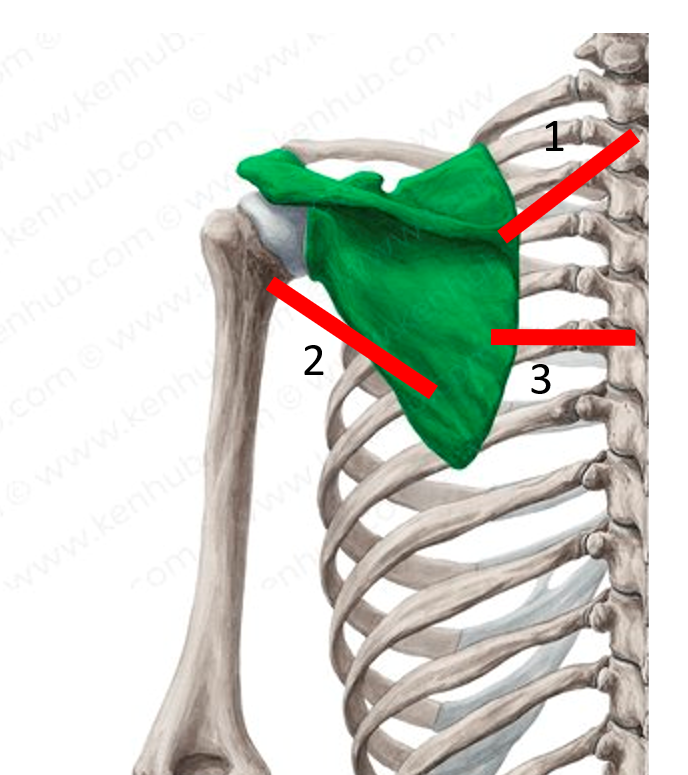

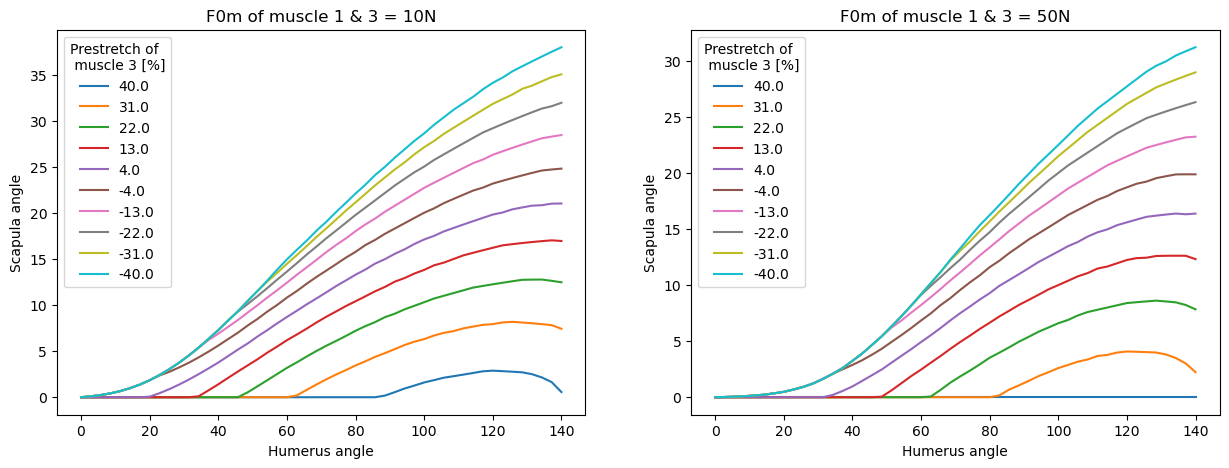

In [10]:
phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
t1 = [-0.2,-0.3]
s1 = [0,-0.2]
s2 = [0.15,-0.1]
h2 = [0.08,0]
t3 = [0.1,-0.3]
s3 = [0.1,-0.2]
l01 = np.sqrt((s1[0]-t1[0])**2+(s1[1]-t1[1])**2)
l02 = np.sqrt((h2[0]-s2[0])**2+(h2[1]-s2[1])**2)
l03 = np.sqrt((s3[0]-t3[0])**2+(s3[1]-t3[1])**2)

pre_stretch = np.linspace(-0.4,0.4,10)
fig,axs = plt.subplots(1,2,figsize=(15, 5),sharey = False)
for i,pre_stretch in enumerate(pre_stretch):
    model_F50 = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model_F50.add_muscle(l0=l01                ,F_iso = 50,epsm0 = 0.6 ,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F50.add_muscle(l0=l03+pre_stretch*l03,F_iso = 50,epsm0 = 0.55,scap_ins=s3,thorax_ins=t3,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F50.add_muscle(l0=l02                ,F_iso = 1 ,epsm0 = 0.5 ,scap_ins=s2,humer_ins =h2,muscle_group = 'ScapHum' ,muscle_model='Thelen')
    U_celk_np_F50 = model_F50.potential_energy()
    phis_opt_F50, alfa_vec = model_F50.scapula_position(U_celk_np_F50)
    
    model_F10 = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model_F10.add_muscle(l0=l01                ,F_iso = 10,epsm0 = 0.6 ,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F10.add_muscle(l0=l03+pre_stretch*l03,F_iso = 10,epsm0 = 0.55,scap_ins=s3,thorax_ins=t3,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F10.add_muscle(l0=l02                ,F_iso = 1 ,epsm0 = 0.5 ,scap_ins=s2,humer_ins =h2,muscle_group = 'ScapHum' ,muscle_model='Thelen')
    U_celk_np_F10 = model_F10.potential_energy()
    phis_opt_F10, alfa_vec = model_F10.scapula_position(U_celk_np_F10)
    axs[0].plot(alfa_vec*180/np.pi,phis_opt_F10*180/np.pi,label='%s' % round(-pre_stretch*100,0))
    axs[1].plot(alfa_vec*180/np.pi,phis_opt_F50*180/np.pi,label='%s' % round(-pre_stretch*100,0))
axs[0].legend(title = 'Prestretch of \n muscle 3 [%]')
axs[0].set_title('F0m of muscle 1 & 3 = 10N')
axs[1].legend(title = 'Prestretch of \n muscle 3 [%]')
axs[1].set_title('F0m of muscle 1 & 3 = 50N')
for ax in axs.flat:
    ax.set(xlabel='Humerus angle', ylabel='Scapula angle')
plt.savefig("3_svaly_prestretch_var")
plt.show()

# Thelen model, 3 svaly: 2 thoracoscapularni a 1 scapulohumeralni
## Sval 2: l0 je delka v pocatecni konfiguraci, F0m je 1N
## Sval 1: l0 je delka v pocatecni konfiguraci, F0m je od 1N a 100N
## sval 3: l0 je delka v pocatecni poloze - 40% optimalni delky, F0m je 1N a 100N
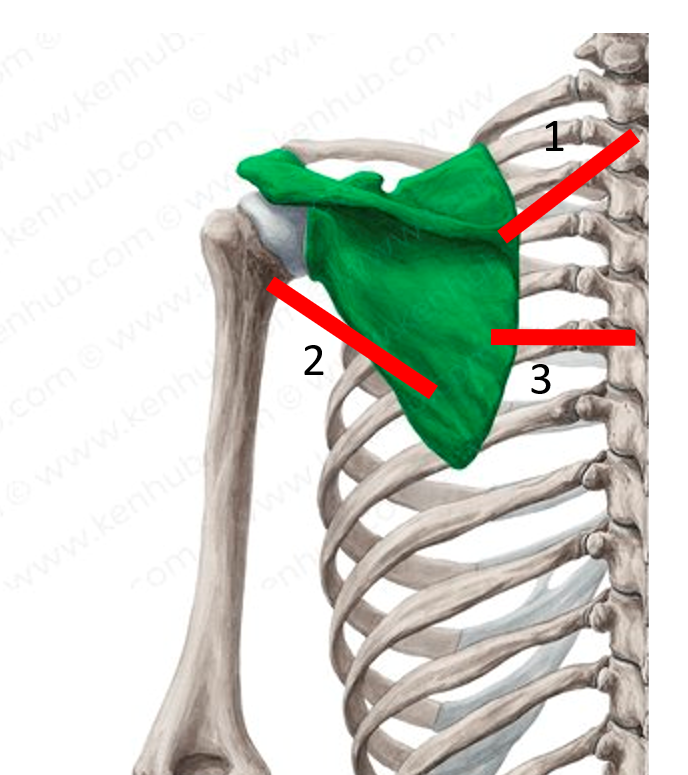

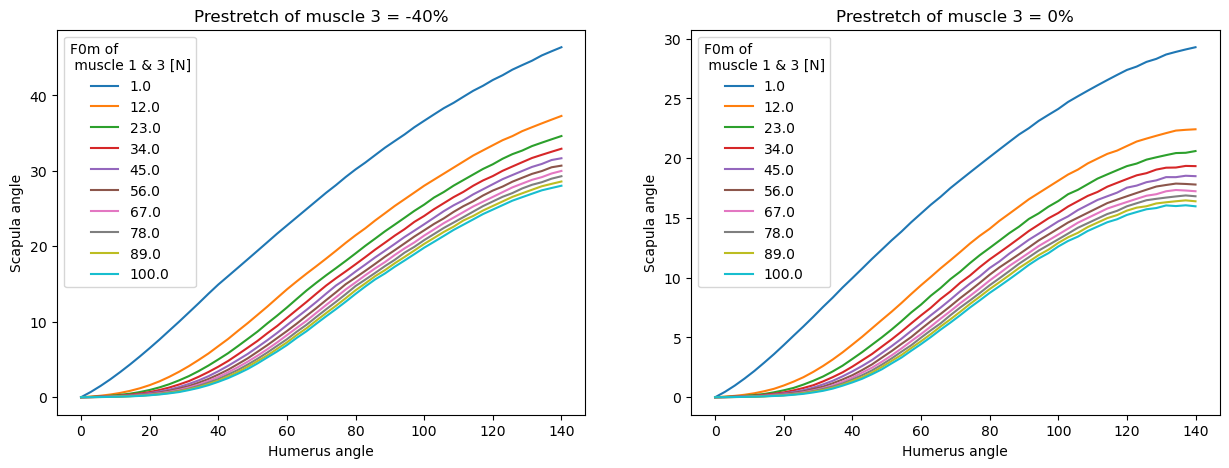

In [6]:
phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
t1 = [-0.2,-0.3]
s1 = [0,-0.2]
s2 = [0.15,-0.1]
h2 = [0.08,0]
t3 = [0.1,-0.3]
s3 = [0.1,-0.2]
l01 = np.sqrt((s1[0]-t1[0])**2+(s1[1]-t1[1])**2)
l02 = np.sqrt((h2[0]-s2[0])**2+(h2[1]-s2[1])**2)
l03 = np.sqrt((s3[0]-t3[0])**2+(s3[1]-t3[1])**2)

F_iso = np.linspace(1,100,10)
fig,axs = plt.subplots(1,2,figsize=(15, 5),sharey = False)
for i,F_iso in enumerate(F_iso):
    model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01,F_iso = F_iso,epsm0 = 0.6,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model.add_muscle(l0=l03+0.04,F_iso = F_iso,epsm0 = 0.55,scap_ins=s3,thorax_ins = t3,muscle_group = 'ThorScap')
    model.add_muscle(l0=l02,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,muscle_group = 'ScapHum',muscle_model='Thelen')
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    # plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi)
    axs[0].plot(alfa_vec*180/np.pi,phis_opt*180/np.pi,label='%s' % round(F_iso,0))
   
    model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01,F_iso = F_iso,epsm0 = 0.6,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model.add_muscle(l0=l03,F_iso = F_iso,epsm0 = 0.55,scap_ins=s3,thorax_ins = t3,muscle_group = 'ThorScap')
    model.add_muscle(l0=l02,F_iso = 1    ,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,muscle_group = 'ScapHum',muscle_model='Thelen')
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    # plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi)
    axs[1].plot(alfa_vec*180/np.pi,phis_opt*180/np.pi,label='%s' % round(F_iso,0))
    
axs[0].legend(title = 'F0m of \n muscle 1 & 3 [N]')
axs[0].set_title('Prestretch of muscle 3 = -40%')
axs[1].legend(title = 'F0m of \n muscle 1 & 3 [N]')
axs[1].set_title('Prestretch of muscle 3 = 0%')
for ax in axs.flat:
    ax.set(xlabel='Humerus angle', ylabel='Scapula angle')
plt.savefig("3_svaly_F0m_var")
plt.show()

# Thelen model, 3 svaly: 2 thoracoscapularni a 1 scapulohumeralni
## Sval 2: l0 je delka v pocatecni konfiguraci, F0m je 1N
## Sval 1: l0 je delka v pocatecni konfiguraci +- 40% optimalni delky, F0m je 10 a 50N
## sval 3: l0 je delka v pocatecni konfiguraci +- 40% optimalni delky, F0m je 10 a 50N
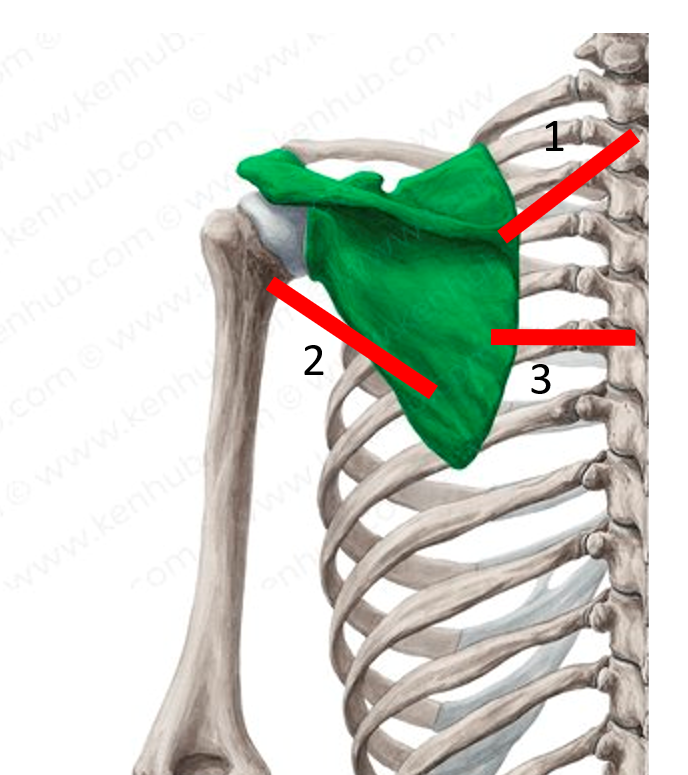

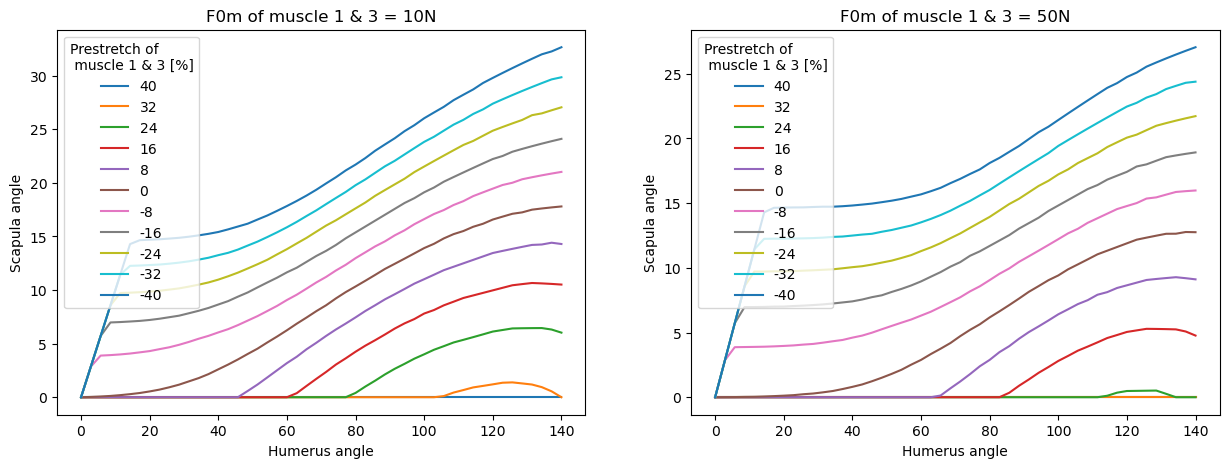

In [5]:
phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
t1 = [-0.2,-0.3]
s1 = [0,-0.2]
s2 = [0.2,-0.1]
h2 = [0.08,0]
t3 = [0.1,-0.3]
s3 = [0.1,-0.2]
l01 = np.sqrt((s1[0]-t1[0])**2+(s1[1]-t1[1])**2)
l02 = np.sqrt((h2[0]-s2[0])**2+(h2[1]-s2[1])**2)
l03 = np.sqrt((s3[0]-t3[0])**2+(s3[1]-t3[1])**2)

pre_stretch = np.linspace(-0.4,0.4,11)
fig,axs = plt.subplots(1,2,figsize=(15, 5),sharey = False)
for i,pre_stretch in enumerate(pre_stretch):
    model_F50 = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model_F50.add_muscle(l0=l01+pre_stretch*l01,F_iso = 50,epsm0 = 0.6 ,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F50.add_muscle(l0=l03+pre_stretch*l03,F_iso = 50,epsm0 = 0.55,scap_ins=s3,thorax_ins=t3,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F50.add_muscle(l0=l02                ,F_iso = 1 ,epsm0 = 0.5 ,scap_ins=s2,humer_ins =h2,muscle_group = 'ScapHum' ,muscle_model='Thelen')
    U_celk_np_F50 = model_F50.potential_energy()
    phis_opt_F50, alfa_vec = model_F50.scapula_position(U_celk_np_F50)
    
    model_F10 = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model_F10.add_muscle(l0=l01+pre_stretch*l01,F_iso = 10,epsm0 = 0.6 ,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F10.add_muscle(l0=l03+pre_stretch*l03,F_iso = 10,epsm0 = 0.55,scap_ins=s3,thorax_ins=t3,muscle_group = 'ThorScap',muscle_model='Thelen')
    model_F10.add_muscle(l0=l02                ,F_iso = 1 ,epsm0 = 0.5 ,scap_ins=s2,humer_ins =h2,muscle_group = 'ScapHum' ,muscle_model='Thelen')
    U_celk_np_F10 = model_F10.potential_energy()
    phis_opt_F10, alfa_vec = model_F10.scapula_position(U_celk_np_F10)
    axs[0].plot(alfa_vec*180/np.pi,phis_opt_F10*180/np.pi,label='%s' % round(-pre_stretch*100,0).astype(int))
    axs[1].plot(alfa_vec*180/np.pi,phis_opt_F50*180/np.pi,label='%s' % round(-pre_stretch*100,0).astype(int))
axs[0].legend(title = 'Prestretch of \n muscle 1 & 3 [%]')
axs[0].set_title('F0m of muscle 1 & 3 = 10N')
axs[1].legend(title = 'Prestretch of \n muscle 1 & 3 [%]')
axs[1].set_title('F0m of muscle 1 & 3 = 50N')
for ax in axs.flat:
    ax.set(xlabel='Humerus angle', ylabel='Scapula angle')
plt.show()

# Thelen model, 3 svaly: 2 thoracoscapularni a 1 scapulohumeralni
## Sval 2: l0 je delka v pocatecni konfiguraci, F0m je 1N
## Sval 1: l0 je delka v pocatecni konfiguraci +- 8% optimalni delky, F0m je od 1 do 100N
## sval 3: l0 je delka v pocatecni konfiguraci +- 8% optimalni delky, F0m je od 1 do 100N
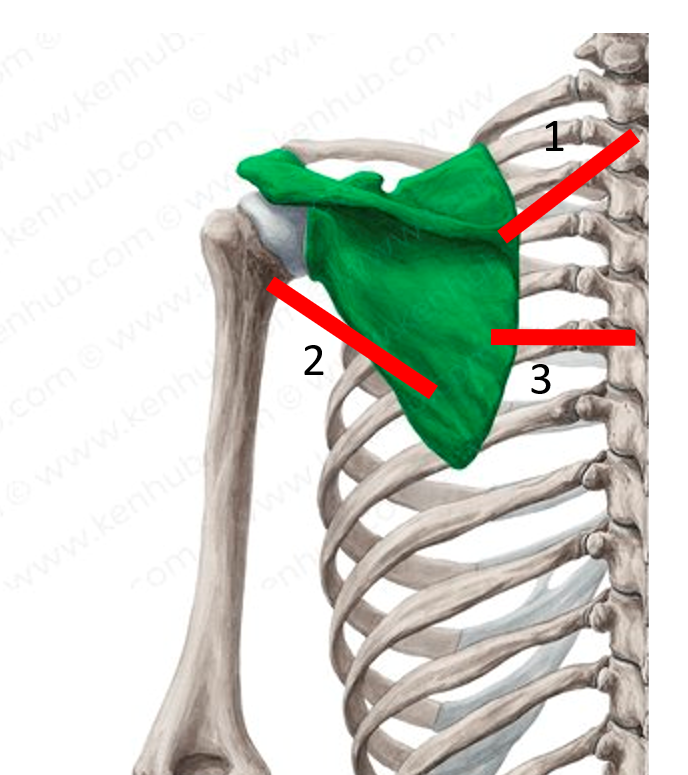

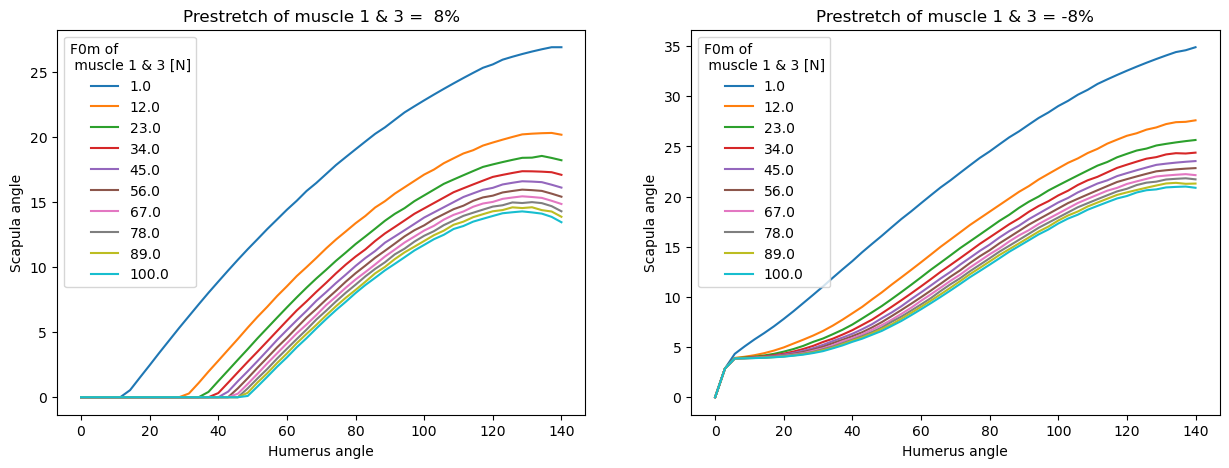

In [6]:
phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
t1 = [-0.2,-0.3]
s1 = [0,-0.2]
s2 = [0.12,-0.1]
h2 = [0.08,0]
t3 = [0.1,-0.3]
s3 = [0.1,-0.2]
l01 = np.sqrt((s1[0]-t1[0])**2+(s1[1]-t1[1])**2)
l02 = np.sqrt((h2[0]-s2[0])**2+(h2[1]-s2[1])**2)
l03 = np.sqrt((s3[0]-t3[0])**2+(s3[1]-t3[1])**2)

F_iso = np.linspace(1,100,10)
pre_stretch1 = -0.08
pre_stretch2 = 0.08
fig,axs = plt.subplots(1,2,figsize=(15, 5),sharey = False)
for i,F_iso in enumerate(F_iso):
    model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01+pre_stretch1*l01,F_iso = F_iso,epsm0 = 0.6,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model.add_muscle(l0=l03+pre_stretch1*l03,F_iso = F_iso,epsm0 = 0.55,scap_ins=s3,thorax_ins = t3,muscle_group = 'ThorScap')
    model.add_muscle(l0=l02                ,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,muscle_group = 'ScapHum',muscle_model='Thelen')
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    # plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi)
    axs[0].plot(alfa_vec*180/np.pi,phis_opt*180/np.pi,label='%s' % round(F_iso,0))
   
    model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01+pre_stretch2*l01,F_iso = F_iso,epsm0 = 0.6,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    model.add_muscle(l0=l03+pre_stretch2*l03,F_iso = F_iso,epsm0 = 0.55,scap_ins=s3,thorax_ins = t3,muscle_group = 'ThorScap')
    model.add_muscle(l0=l02,F_iso = 1    ,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,muscle_group = 'ScapHum',muscle_model='Thelen')
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    # plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi)
    axs[1].plot(alfa_vec*180/np.pi,phis_opt*180/np.pi,label='%s' % round(F_iso,0))
    
axs[0].legend(title = 'F0m of \n muscle 1 & 3 [N]')
axs[0].set_title('Prestretch of muscle 1 & 3 =  %s%%' % int(-pre_stretch1*100))
axs[1].legend(title = 'F0m of \n muscle 1 & 3 [N]')
axs[1].set_title('Prestretch of muscle 1 & 3 = %s%%' % int(-pre_stretch2*100))
for ax in axs.flat:
    ax.set(xlabel='Humerus angle', ylabel='Scapula angle')
plt.show()